In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Q1 Data Loading

In [2]:
confirmed = pd.read_csv("/content/covid_19_confirmed_v1_lyst1747728690432.csv")

In [3]:
recovered = pd.read_csv("/content/covid_19_recovered_v1_lyst1747728719904.csv")

In [4]:
deaths = pd.read_csv("/content/covid_19_deaths_v1_lyst1747728711771.csv")

Q2 Data Exploration

In [5]:
print(f"Confirmmed cases dataset has {confirmed.shape[0]} rows and {confirmed.shape[1]} columns")
print(confirmed.dtypes)
print()
print("-"*50)
print()
print(f"recovered cases dataset has {recovered.shape[0]} rows and {recovered.shape[1]} columns")
print(confirmed.dtypes)
print()
print("-"*50)
print()
print(f"Deaths cases dataset has {deaths.shape[0]} rows and {deaths.shape[1]} columns")
print(confirmed.dtypes)

Confirmmed cases dataset has 276 rows and 498 columns
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

--------------------------------------------------

recovered cases dataset has 262 rows and 498 columns
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

--------------------------------------------------

Deaths cases dataset has 277 rows and 498 columns
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20

In [6]:
confirmed_cases = confirmed.drop(columns=["Province/State", "Lat", "Long"])
confirmed_cases = confirmed_cases.groupby("Country/Region").sum().sort_values(by="5/29/21", ascending=False)
confirmed_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,33056765,33085106,33104884,33117737,33143662,33166418,33190470,33217995,33239963,33251939
India,0,0,0,0,0,0,0,0,1,1,...,26031991,26289290,26530132,26752447,26948874,27157795,27369093,27555457,27729247,27894800
Brazil,0,0,0,0,0,0,0,0,0,0,...,15894094,15970949,16047439,16083258,16120756,16194209,16274695,16342162,16391930,16471600
France,0,0,2,3,3,3,4,5,5,5,...,5629983,5642786,5655397,5665101,5667331,5670486,5683143,5697076,5708350,5719877
Turkey,0,0,0,0,0,0,0,0,0,0,...,5160423,5169951,5178648,5186487,5194010,5203385,5212123,5220549,5228322,5235978


In [7]:
top_n_countries = confirmed_cases.T
top_n_countries.index = pd.to_datetime(top_n_countries.index)

/tmp/ipython-input-7-2044260799.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  top_n_countries.index = pd.to_datetime(top_n_countries.index)


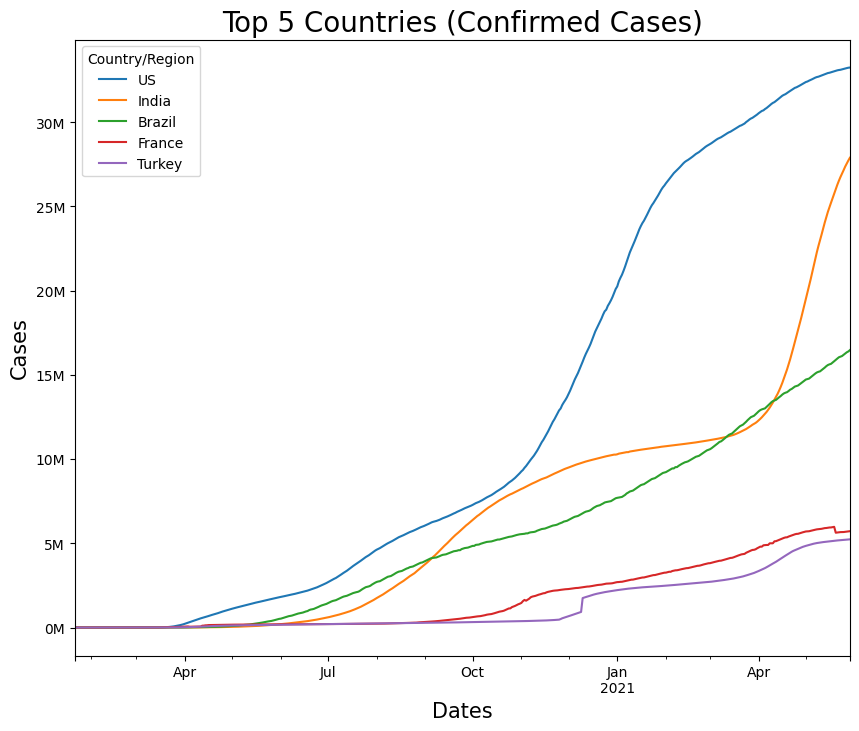

In [8]:
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_title("Top 5 Countries (Confirmed Cases)", fontsize=20)
top_n_countries.iloc[:,:5].plot(kind="line", ax=ax, linestyle="-", linewidth=1.5)
ax.yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.0f}M")
ax.set_xlabel("Dates", fontsize=15)
ax.set_ylabel("Cases", fontsize=15)
plt.show()

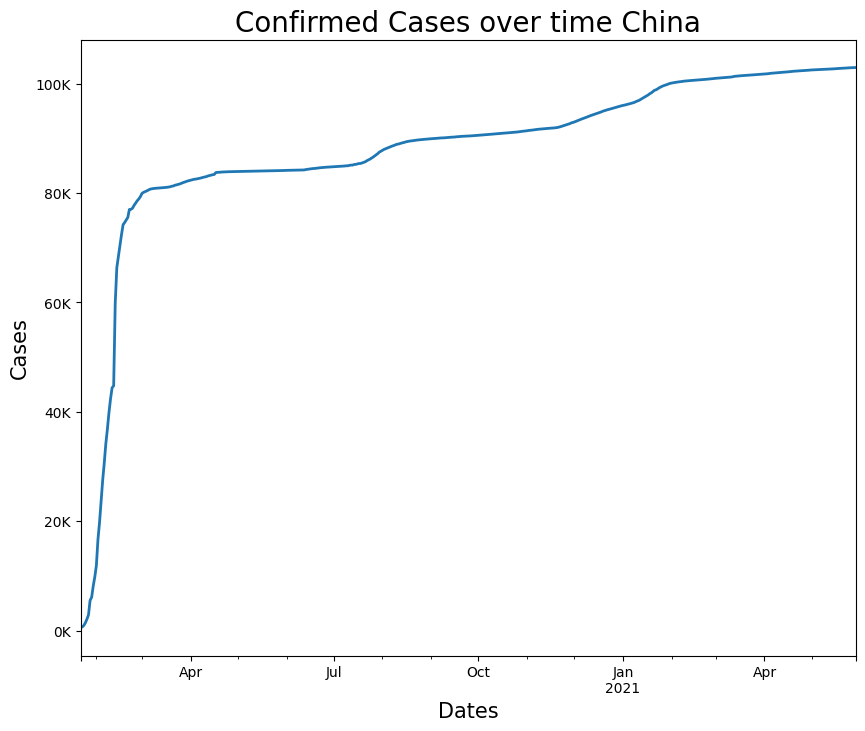

In [9]:
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_title("Confirmed Cases over time China", fontsize=20)
top_n_countries["China"].plot(kind="line", ax=ax, linestyle="-", linewidth=2)
ax.set_xlabel("Dates", fontsize=15)
ax.set_ylabel("Cases", fontsize=15)
ax.yaxis.set_major_formatter(lambda x, _: f"{x/1000:.0f}K")
plt.show()

Q3. Handling Missing Data

In [10]:
confirmed.isnull().sum()[confirmed.isnull().sum() > 0]

,0
Province/State,190
Lat,2
Long,2


In [11]:
confirmed["Province/State"] = confirmed["Province/State"].fillna("All Province")
confirmed[["Lat", "Long"]] = confirmed[["Lat", "Long"]].ffill()
confirmed[confirmed.columns[4:]] = confirmed[confirmed.columns[4:]].ffill(axis=1)

In [12]:
recovered.columns = [col_name for col_name in recovered.iloc[0]]
recovered.drop(0, inplace=True)
recovered = recovered.reset_index(drop=True)

In [13]:
recovered.isna().sum()[recovered.isna().sum() > 1]
recovered["Province/State"] = recovered["Province/State"].fillna("All Province")
for col_name in recovered.columns[4:]:
  recovered[col_name] = pd.to_numeric(recovered[col_name], errors="coerce").astype("Int64")
recovered.dtypes

,0
Province/State,object
Country/Region,object
Lat,object
Long,object
1/22/20,Int64
...,...
5/25/21,Int64
5/26/21,Int64
5/27/21,Int64
5/28/21,Int64


In [14]:
deaths.columns = [col_name for col_name in deaths.loc[0]]
deaths.drop(0, inplace=True)
deaths = deaths.reset_index(drop=True)

In [15]:
deaths["Province/State"] = deaths["Province/State"].fillna("All Province")
# deaths.drop(columns=["Province/State\t"], inplace=True)
deaths[["Lat", "Long"]] = deaths[["Lat", "Long"]].ffill()
deaths[deaths.columns[4:]] = deaths[deaths.columns[4:]].ffill(axis=1)

In [16]:
for col_name in deaths.columns[4:]:
  deaths[col_name] = pd.to_numeric(deaths[col_name], errors="coerce").astype("Int64")
deaths.dtypes

,0
Province/State,object
Country/Region,object
Lat,object
Long,object
1/22/20,Int64
...,...
5/25/21,Int64
5/26/21,Int64
5/27/21,Int64
5/28/21,Int64


Q4. Data Cleaning and Prepration (aready done!)

Q5. Independent Data Analysis

In [17]:
selected_countries = ["Germany", "France", "Italy"]
confirmed_daily = confirmed.drop(columns=["Province/State", "Lat", "Long"])
confirmed_daily = confirmed_daily.groupby("Country/Region").sum()
confirmed_daily_new_cases = confirmed_daily.diff(axis=1)
confirmed_daily_new_cases.iloc[:,0] = confirmed_daily.iloc[:,0]
confirmed_daily_new_cases["1/22/20"] = confirmed_daily_new_cases["1/22/20"].astype("Int64")
confirmed_daily_new_cases

/tmp/ipython-input-17-1422162333.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  confirmed_daily_new_cases = confirmed_daily.diff(axis=1)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,453,505,406,242,547,628,840,623,764,981
Albania,0,0,0,0,0,0,0,0,0,0,...,23,35,23,33,6,14,15,20,21,12
Algeria,0,0,0,0,0,0,0,0,0,0,...,260,278,217,209,247,254,285,280,272,258
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,95,7,11,11,0
Angola,0,0,0,0,0,0,0,0,0,0,...,223,248,240,292,182,310,405,269,337,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,0,0,0,0,0,0,0,0,...,89,132,178,156,129,527,155,270,40,512
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,0,436,233,0,576,557,461,0,774,269
Yemen,0,0,0,0,0,0,0,0,0,0,...,20,19,17,9,4,8,18,8,27,8


In [18]:
confirmed_daily_new_cases_peak = confirmed_daily_new_cases.max(axis=1)
confirmed_daily_new_cases_peak_country = confirmed_daily_new_cases_peak.loc[selected_countries]
confirmed_daily_new_cases_peak_country

,0
Country/Region,
Germany,49044
France,117900
Italy,40902


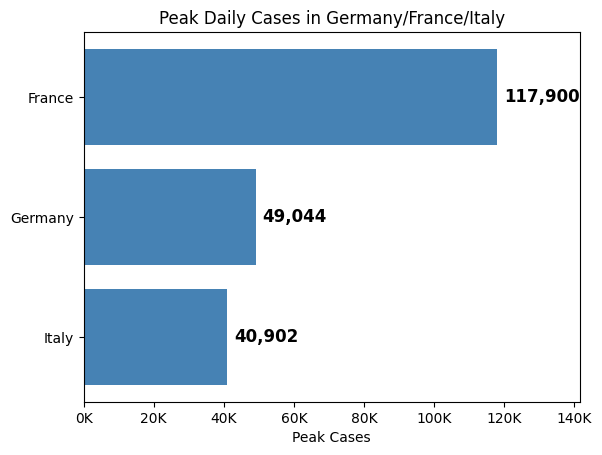

<Figure size 1000x1000 with 0 Axes>

In [19]:
ax = plt.gca()
plt.figure(figsize=(10, 10))
ax.set_title("Peak Daily Cases in Germany/France/Italy")
bars = ax.barh(confirmed_daily_new_cases_peak_country.sort_values().index, confirmed_daily_new_cases_peak_country.sort_values(), color="steelblue")
ax.set_xlabel("Peak Cases")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"{x/1000:.0f}K"))
ax.bar_label(bars, fmt='{:,.0f}', padding=5, fontsize=12, fontweight='bold')
ax.set_xlim(right=confirmed_daily_new_cases_peak_country.max() * 1.2)
plt.tight_layout()
plt.show()

In [20]:
idx = confirmed_daily_new_cases_peak_country.idxmax()
date = confirmed_daily_new_cases.loc[idx].idxmax()
print(f"Country with highest daily peak cases is {idx} with {confirmed_daily_new_cases.loc[idx].max()} cases on {date}")

Country with highest daily peak cases is France with 117900 cases on 4/11/21


In [21]:
confirmed_df = confirmed.drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum()
recovered_df = recovered.drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum()

In [22]:
pd.Series(confirmed_df.columns == recovered_df.columns).value_counts()
pd.Series(confirmed_df.index == recovered_df.index).value_counts()

,count
True,193


In [23]:
recovery_rates = recovered_df.div(confirmed_df)
recovery_rates_ca_as = recovery_rates.loc[["Canada", "Australia"], ["12/31/20"]]

In [24]:
print(f"{recovery_rates_ca_as.idxmax().iloc[0]} has managed to get a better recovery rates of {recovery_rates_ca_as.max().iloc[0] * 100:.2f}%")

Canada has managed to get a better recovery rates of 84.47%


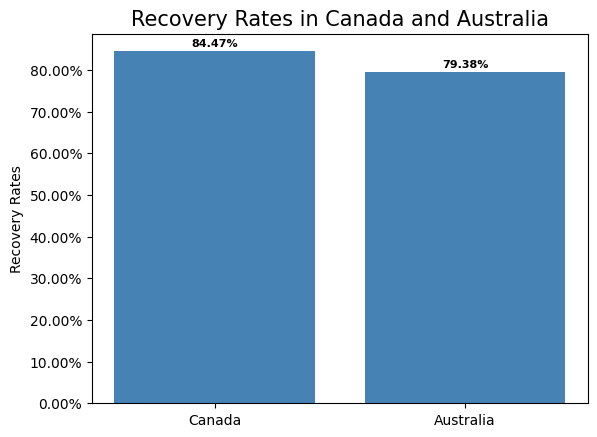

In [25]:
ax = plt.gca()
ax.set_title("Recovery Rates in Canada and Australia", fontsize=15)
bars = ax.bar(recovery_rates_ca_as.index, recovery_rates_ca_as["12/31/20"], color=["steelblue"])
ax.yaxis.set_major_formatter(lambda x, _: f"{x:.2%}".format(x))
ax.bar_label(bars, fmt="{:.2%}", padding=2, fontsize=8, fontweight='bold')
ax.set_ylabel("Recovery Rates", fontsize=10)
plt.xticks(rotation=360)
plt.show()

In [26]:
pd.Series(confirmed.columns == deaths.columns).value_counts()
pd.Series(confirmed.index == deaths.index).value_counts()

,count
True,276


In [27]:
confirmed_province_ca = confirmed[confirmed["Country/Region"] == "Canada"]
confirmed_province_ca = confirmed_province_ca.drop(columns=["Country/Region", "Lat", "Long"]).reset_index(drop=True)
confirmed_province_ca = confirmed_province_ca.groupby("Province/State").sum()

In [28]:
deaths_province_ca = deaths[deaths["Country/Region"] == "Canada"]
deaths_province_ca = deaths_province_ca.drop(columns=["Country/Region","Lat", "Long"]).reset_index(drop=True)
deaths_province_ca = deaths_province_ca.groupby("Province/State").sum()

In [29]:
deaths_rates_ca_province = deaths_province_ca.div(confirmed_province_ca)
deaths_rates_ca_province_latest = deaths_rates_ca_province[deaths_rates_ca_province.columns[-1]]

In [30]:
deaths_rates_ca_province_latest.replace(np.inf, np.nan, inplace=True)
deaths_rates_ca_province_latest

,5/29/21
Province/State,
Alberta,0.00976
British Columbia,0.011784
Diamond Princess,<NA>
Grand Princess,0.0
Manitoba,0.020693
New Brunswick,0.019626
Newfoundland and Labrador,0.004608
Northwest Territories,0.0
Nova Scotia,0.01519


In [31]:
deaths_rates_ca_province_latest.drop(["Diamond Princess", "Grand Princess", "Repatriated Travellers"], inplace=True)
deaths_rates_ca_province_latest = deaths_rates_ca_province_latest.sort_values()

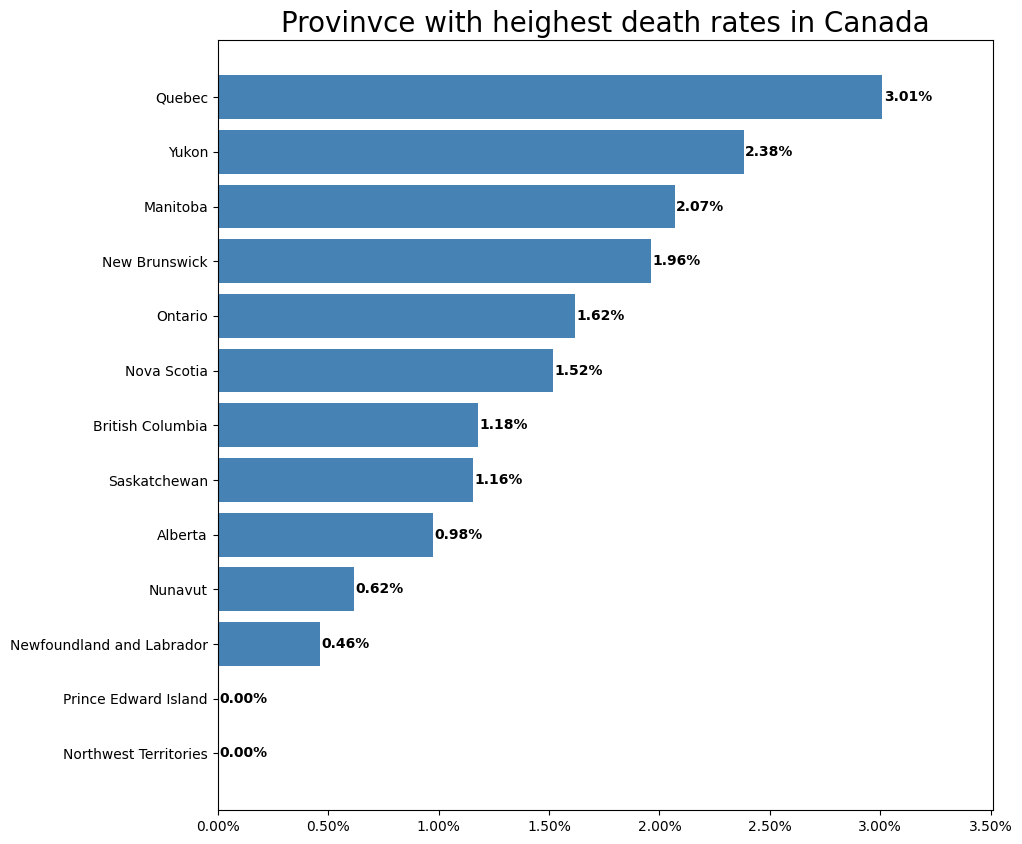

In [32]:
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_title("Provinvce with heighest death rates in Canada", fontsize=20)
bars = ax.barh(deaths_rates_ca_province_latest.index, deaths_rates_ca_province_latest, color="steelblue")
ax.bar_label(bars, fmt="{:.2%}", padding=1, fontweight="bold")
ax.xaxis.set_major_formatter(lambda x, _: f"{x:.2%}".format(x))
ax.set_xlim(right=deaths_rates_ca_province_latest.max() + 0.005)
plt.show()

In [33]:
print(f"Province with heighest death rates is {deaths_rates_ca_province_latest.idxmax()} with death rates {deaths_rates_ca_province_latest[deaths_rates_ca_province_latest.idxmax()]:.2%}")

Province with heighest death rates is Quebec with death rates 3.01%


In [34]:
print(f"Province with lowest death rates is {deaths_rates_ca_province_latest.idxmin()} with death rates {deaths_rates_ca_province_latest[deaths_rates_ca_province_latest.idxmin()]:.2%}")

Province with lowest death rates is Northwest Territories with death rates 0.00%


**Q6. Data Transformation**

In [35]:
confirmed_long = pd.melt(frame=confirmed, id_vars=["Province/State", "Country/Region", "Lat", "Long"], value_vars=confirmed.columns[4:], var_name="Dates", value_name="Cases")
confirmed_long.head()

,Province/State,Country/Region,Lat,Long,Dates,Cases
0,All Province,Afghanistan,33.93911,67.709953,1/22/20,0
1,All Province,Albania,41.15330,20.168300,1/22/20,0
2,All Province,Algeria,28.03390,1.659600,1/22/20,0
3,All Province,Andorra,42.50630,1.521800,1/22/20,0
4,All Province,Angola,-11.20270,17.873900,1/22/20,0


In [36]:
recovered_long = pd.melt(frame=recovered, id_vars=["Province/State", "Country/Region", "Lat", "Long"], value_vars=recovered.columns[4:], var_name="Dates", value_name="Recovered")
recovered_long.head()

,Province/State,Country/Region,Lat,Long,Dates,Recovered
0,All Province,Afghanistan,33.93911,67.709953,1/22/20,0
1,All Province,Albania,41.1533,20.1683,1/22/20,0
2,All Province,Algeria,28.0339,1.6596,1/22/20,0
3,All Province,Andorra,42.5063,1.5218,1/22/20,0
4,All Province,Angola,-11.2027,17.8739,1/22/20,0


In [37]:
deaths_long = pd.melt(frame=deaths, id_vars=["Province/State", "Country/Region", "Lat", "Long"], value_vars=deaths.columns[4:], var_name="Dates", value_name="Deaths")
deaths_long.tail()

,Province/State,Country/Region,Lat,Long,Dates,Deaths
136339,All Province,Vietnam,14.058324,108.277199,5/29/21,47
136340,All Province,West Bank and Gaza,31.9522,35.2332,5/29/21,3492
136341,All Province,Yemen,15.552727,48.516388,5/29/21,1319
136342,All Province,Zambia,-13.133897,27.849332,5/29/21,1276
136343,All Province,Zimbabwe,-19.015438,29.154857,5/29/21,1594


In [38]:
confirmed_long["Dates"] = pd.to_datetime(confirmed_long["Dates"])
recovered_long["Dates"] = pd.to_datetime(recovered_long["Dates"])
deaths_long["Dates"] = pd.to_datetime(deaths_long["Dates"])
confirmed_long.info()
recovered_long.info()
deaths_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  136344 non-null  object        
 1   Country/Region  136344 non-null  object        
 2   Lat             136344 non-null  float64       
 3   Long            136344 non-null  float64       
 4   Dates           136344 non-null  datetime64[ns]
 5   Cases           136344 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128934 entries, 0 to 128933
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  128934 non-null  object        
 1   Country/Region  128934 non-null  object        
 2   Lat             128440 non-null  object        
 3   Long 

/tmp/ipython-input-38-2745643917.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long["Dates"] = pd.to_datetime(confirmed_long["Dates"])
/tmp/ipython-input-38-2745643917.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_long["Dates"] = pd.to_datetime(recovered_long["Dates"])
/tmp/ipython-input-38-2745643917.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_long["Dates"] = pd.to_datetime(deaths_long["Dates"])


In [39]:
deaths_long_total = deaths_long[deaths_long["Dates"] == deaths_long["Dates"].max()]
deaths_long_total_sorted = deaths_long_total.groupby("Country/Region")["Deaths"].sum().sort_values()
deaths_long_total_sorted

,Deaths
Country/Region,
Dominica,0
Marshall Islands,0
Kiribati,0
Holy See,0
Micronesia,0
...,...
United Kingdom,128037
Mexico,223455
India,325972


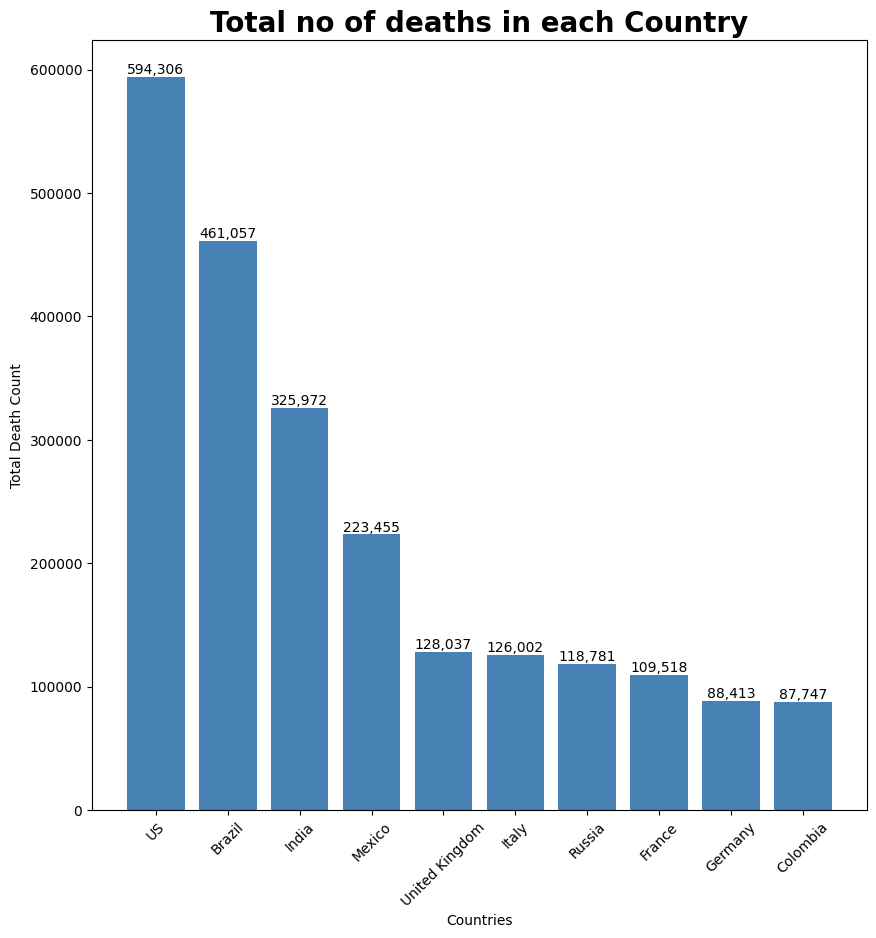

In [40]:
data = deaths_long_total_sorted.tail(10).sort_values(ascending=False)
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_title("Total no of deaths in each Country", fontsize=20, fontweight="bold")
bars = ax.bar(data.index, data, color="steelblue")
ax.set_ylabel("Total Death Count")
ax.set_xlabel("Countries")
ax.bar_label(bars, fmt="{:,.0f}")
plt.xticks(rotation=45)
plt.show()

In [41]:
deaths_long_total_selected = deaths_long_total_sorted.loc[deaths_long_total_sorted.index.isin(["US", "Italy", "Brazil"])].sort_values(ascending=False)

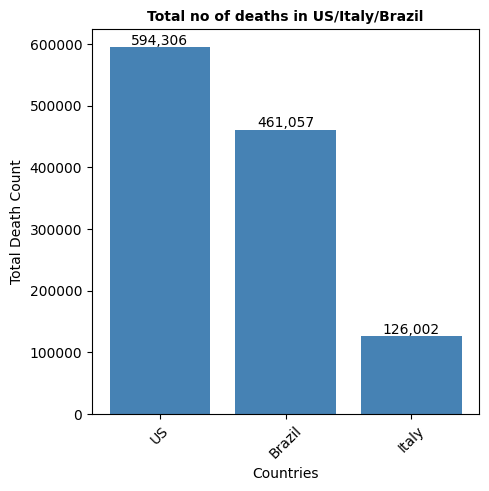

In [42]:
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.set_title("Total no of deaths in US/Italy/Brazil", fontsize=10, fontweight="bold")
bars = ax.bar(deaths_long_total_selected.index, deaths_long_total_selected, color="steelblue")
ax.set_ylabel("Total Death Count")
ax.set_xlabel("Countries")
ax.bar_label(bars, fmt="{:,.0f}")
plt.xticks(rotation=45)
plt.show()

In [43]:
deaths_long_sorted = deaths_long.sort_values(by=["Country/Region", "Dates"])
deaths_long_sorted["Daily"] = deaths_long_sorted.groupby("Country/Region")["Deaths"].diff()
deaths_long_sorted["Daily"] = deaths_long_sorted["Daily"].fillna(deaths_long_sorted["Deaths"])

In [44]:
avg_daily_deaths = deaths_long_sorted.groupby("Country/Region")["Daily"].mean()
avg_daily_deaths_top_5 = avg_daily_deaths.sort_values(ascending=False).head()
print("Countries with heighest avg daily deaths is")
avg_daily_deaths_top_5

Countries with heighest avg daily deaths is


,Daily
Country/Region,
US,1203.048583
Brazil,933.313765
India,659.862348
Mexico,452.338057
Italy,255.064777


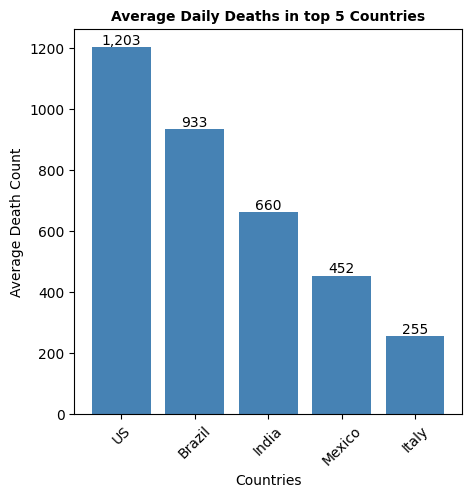

In [45]:
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.set_title("Average Daily Deaths in top 5 Countries", fontsize=10, fontweight="bold")
bars = ax.bar(avg_daily_deaths_top_5.index, avg_daily_deaths_top_5, color="steelblue")
ax.set_ylabel("Average Death Count")
ax.set_xlabel("Countries")
ax.bar_label(bars, fmt="{:,.0f}")
plt.xticks(rotation=45)
plt.show()

In [46]:
deaths_long_sorted_us = deaths_long_sorted[deaths_long_sorted["Country/Region"] == "US"][["Dates", "Deaths"]]
deaths_long_sorted_us.head(1)

,Dates,Deaths
251,2020-01-22,0


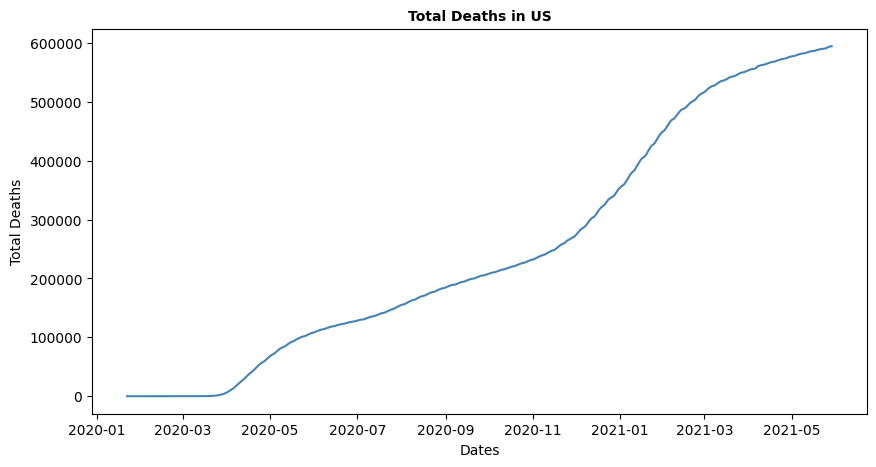

In [47]:
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title("Total Deaths in US", fontsize=10, fontweight="bold")
ax.plot(deaths_long_sorted_us["Dates"], deaths_long_sorted_us["Deaths"], color="steelblue")
ax.set_ylabel("Total Deaths")
ax.set_xlabel("Dates")
plt.show()

In [55]:
print(confirmed_long.head())
print(recovered_long.head())
print(deaths_long.head())

  Province/State Country/Region       Lat       Long      Dates  Cases
0   All Province    Afghanistan  33.93911  67.709953 2020-01-22      0
1   All Province        Albania  41.15330  20.168300 2020-01-22      0
2   All Province        Algeria  28.03390   1.659600 2020-01-22      0
3   All Province        Andorra  42.50630   1.521800 2020-01-22      0
4   All Province         Angola -11.20270  17.873900 2020-01-22      0
  Province/State Country/Region       Lat       Long      Dates  Recovered
0   All Province    Afghanistan  33.93911  67.709953 2020-01-22          0
1   All Province        Albania   41.1533    20.1683 2020-01-22          0
2   All Province        Algeria   28.0339     1.6596 2020-01-22          0
3   All Province        Andorra   42.5063     1.5218 2020-01-22          0
4   All Province         Angola  -11.2027    17.8739 2020-01-22          0
  Province/State Country/Region       Lat       Long      Dates  Deaths
0   All Province    Afghanistan  33.93911  67.709953

Q7. Data Merging

In [49]:
merge_confirm_recovered = pd.merge(left=confirmed_long.drop(["Lat", "Long"], axis=1), right=recovered_long.drop(["Lat", "Long"], axis=1), on=["Country/Region", "Province/State", "Dates"], how="outer")
merge_confirm_recovered["Cases"] = merge_confirm_recovered["Cases"].astype("Int64")
merge_confirm_recovered_deaths = pd.merge(left=merge_confirm_recovered, right=deaths_long.drop(["Lat", "Long"], axis=1), on=["Country/Region", "Province/State", "Dates"], how="outer")
merge_confirm_recovered_deaths

,Province/State,Country/Region,Dates,Cases,Recovered,Deaths
0,All Province,Afghanistan,2020-01-22,0,0,0
1,All Province,Afghanistan,2020-01-23,0,0,0
2,All Province,Afghanistan,2020-01-24,0,0,0
3,All Province,Afghanistan,2020-01-25,0,0,0
4,All Province,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...,...
136833,All Province,Zimbabwe,2021-05-25,38706,36517,1587
136834,All Province,Zimbabwe,2021-05-26,38819,36531,1589
136835,All Province,Zimbabwe,2021-05-27,38854,36541,1592
136836,All Province,Zimbabwe,2021-05-28,38918,36563,1592


In [117]:
# merge_confirm_recovered_deaths.drop(columns=["Month_Year"], inplace=True)
merged_data = merge_confirm_recovered_deaths.groupby(["Country/Region", "Dates"])[["Cases", "Recovered", "Deaths"]].sum().reset_index()
merged_data[["Daily_Cases", "Daily_Recovered", "Daily_Deaths"]] = merged_data.groupby("Country/Region")[["Cases", "Recovered", "Deaths"]].diff()
merged_data["Daily_Cases"] = merged_data["Daily_Cases"].fillna(merged_data["Cases"])
merged_data["Daily_Recovered"] = merged_data["Daily_Recovered"].fillna(merged_data["Recovered"])
merged_data["Daily_Deaths"] = merged_data["Daily_Deaths"].fillna(merged_data["Deaths"])
merged_data["Month_Year"] = merged_data["Dates"].dt.to_period("M")
merged_data

,Country/Region,Dates,Cases,Recovered,Deaths,Daily_Cases,Daily_Recovered,Daily_Deaths,Month_Year
0,Afghanistan,2020-01-22,0,0,0,0,0,0,2020-01
1,Afghanistan,2020-01-23,0,0,0,0,0,0,2020-01
2,Afghanistan,2020-01-24,0,0,0,0,0,0,2020-01
3,Afghanistan,2020-01-25,0,0,0,0,0,0,2020-01
4,Afghanistan,2020-01-26,0,0,0,0,0,0,2020-01
...,...,...,...,...,...,...,...,...,...
95337,Zimbabwe,2021-05-25,38706,36517,1587,10,46,1,2021-05
95338,Zimbabwe,2021-05-26,38819,36531,1589,113,14,2,2021-05
95339,Zimbabwe,2021-05-27,38854,36541,1592,35,10,3,2021-05
95340,Zimbabwe,2021-05-28,38918,36563,1592,64,22,0,2021-05


In [118]:
merged_data_monthly = merged_data.groupby(["Country/Region", "Month_Year"])[["Daily_Cases", "Daily_Recovered", "Daily_Deaths"]].sum().reset_index()
merged_data_monthly.head()

,Country/Region,Month_Year,Daily_Cases,Daily_Recovered,Daily_Deaths
0,Afghanistan,2020-01,0,0,0
1,Afghanistan,2020-02,1,0,0
2,Afghanistan,2020-03,174,5,4
3,Afghanistan,2020-04,1952,255,60
4,Afghanistan,2020-05,13081,1068,194


In [119]:
merged_data[(merged_data["Country/Region"] == "US") & (merged_data["Month_Year"] == "2020-12")]

,Country/Region,Dates,Cases,Recovered,Deaths,Daily_Cases,Daily_Recovered,Daily_Deaths,Month_Year
88740,US,2020-12-01,13858551,5226581,273566,188219,80262,2546,2020-12
88741,US,2020-12-02,14061108,5322128,276381,202557,95547,2815,2020-12
88742,US,2020-12-03,14284721,5404018,279337,223613,81890,2956,2020-12
88743,US,2020-12-04,14517506,5470389,282036,232785,66371,2699,2020-12
88744,US,2020-12-05,14733048,5576026,284390,215542,105637,2354,2020-12
88745,US,2020-12-06,14914060,5624444,285736,181012,48418,1346,2020-12
88746,US,2020-12-07,15108918,5714557,287342,194858,90113,1606,2020-12
88747,US,2020-12-08,15333410,5786915,289963,224492,72358,2621,2020-12
88748,US,2020-12-09,15555949,5889896,293146,222539,102981,3183,2020-12
88749,US,2020-12-10,15787464,5985047,296141,231515,95151,2995,2020-12


In [121]:
merged_data.iloc[88425:88427]

,Country/Region,Dates,Cases,Recovered,Deaths,Daily_Cases,Daily_Recovered,Daily_Deaths,Month_Year
88425,Turkey,2021-05-29,5235978,5094279,47271,7656,11180,137,2021-05
88426,US,2020-01-22,1,0,0,1,0,0,2020-01


In [165]:
merged_data_monthly_us = merged_data_monthly[merged_data_monthly["Country/Region"] == "US"]

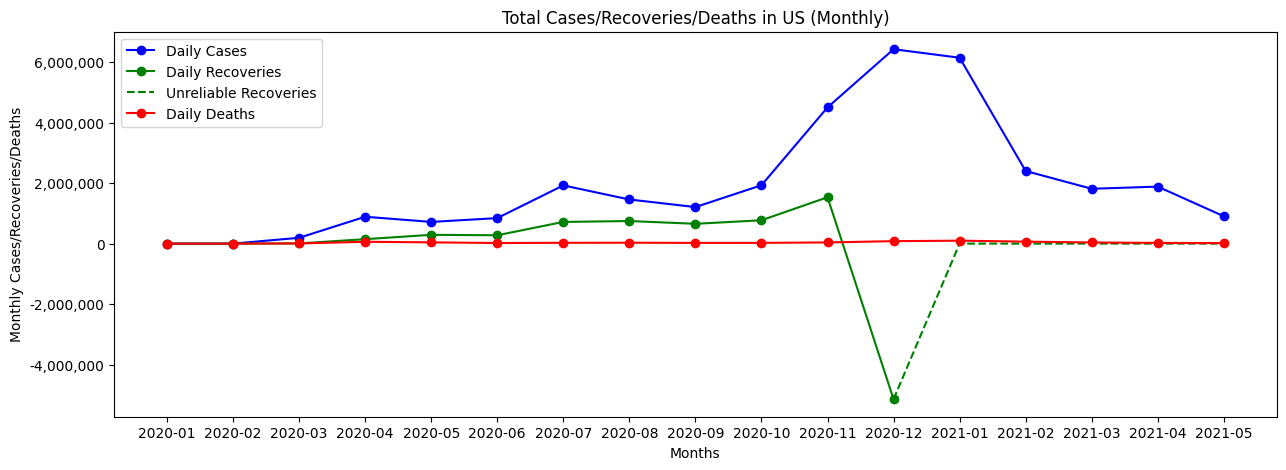

In [188]:
badrecovery = merged_data_monthly_us[merged_data_monthly_us["Month_Year"] >= "2020-12"]
goodrecovery = merged_data_monthly_us[merged_data_monthly_us["Month_Year"] <= "2020-12"]
plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.set_title("Total Cases/Recoveries/Deaths in US (Monthly)")
ax.plot(merged_data_monthly_us["Month_Year"].astype(str), merged_data_monthly_us["Daily_Cases"], label='Daily Cases', color='blue', marker="o")
ax.plot(goodrecovery["Month_Year"].astype(str), goodrecovery["Daily_Recovered"], label='Daily Recoveries', color='green', marker="o")
ax.plot(badrecovery["Month_Year"].astype(str), badrecovery["Daily_Recovered"], label='Unreliable Recoveries', linestyle="--", color='green')
ax.plot(merged_data_monthly_us["Month_Year"].astype(str), merged_data_monthly_us["Daily_Deaths"], label='Daily Deaths', color='red', marker="o")
ax.set_xlabel("Months")
ax.set_ylabel("Monthly Cases/Recoveries/Deaths")
ax.yaxis.set_major_formatter(lambda x,_: f"{x:,.0f}".format(x))
ax.legend(loc="upper left")
plt.show()

In [178]:
merged_data_monthly_brazil = merged_data_monthly[merged_data_monthly["Country/Region"] == "Brazil"]

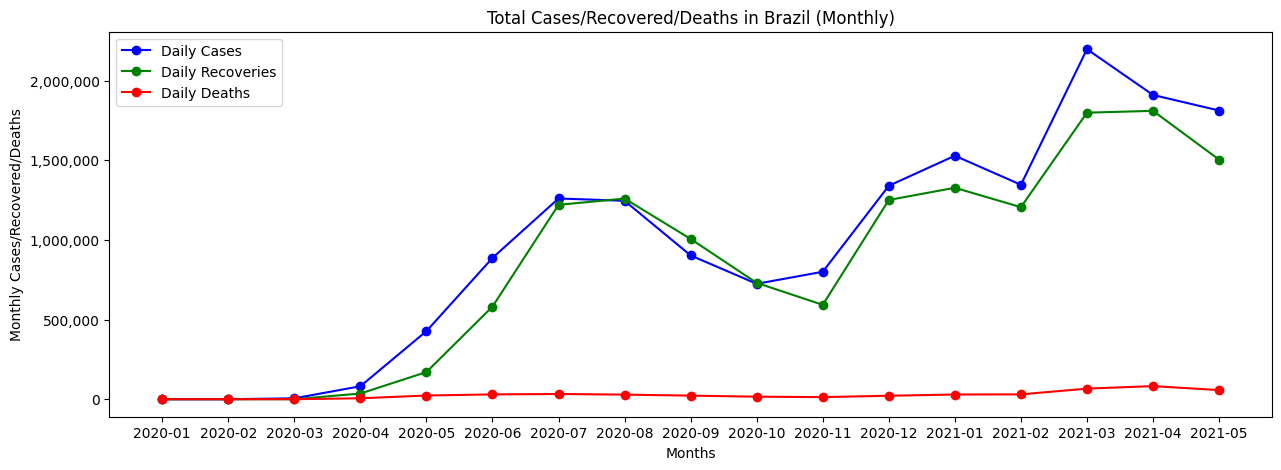

In [184]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.set_title("Total Cases/Recoveries/Deaths in Brazil (Monthly)")
ax.plot(merged_data_monthly_brazil["Month_Year"].astype(str), merged_data_monthly_brazil["Daily_Cases"], label='Daily Cases', color='blue', marker="o")
ax.plot(merged_data_monthly_brazil["Month_Year"].astype(str), merged_data_monthly_brazil["Daily_Recovered"], label='Daily Recoveries', color='green', marker="o")
ax.plot(merged_data_monthly_brazil["Month_Year"].astype(str), merged_data_monthly_brazil["Daily_Deaths"], label='Daily Deaths', color='red', marker="o")
ax.set_xlabel("Months")
ax.set_ylabel("Monthly Cases/Recoveries/Deaths")
ax.yaxis.set_major_formatter(lambda x,_: f"{x:,.0f}".format(x))
ax.legend(loc="upper left")
plt.show()

In [181]:
merged_data_monthly_italy = merged_data_monthly[merged_data_monthly["Country/Region"] == "Italy"]

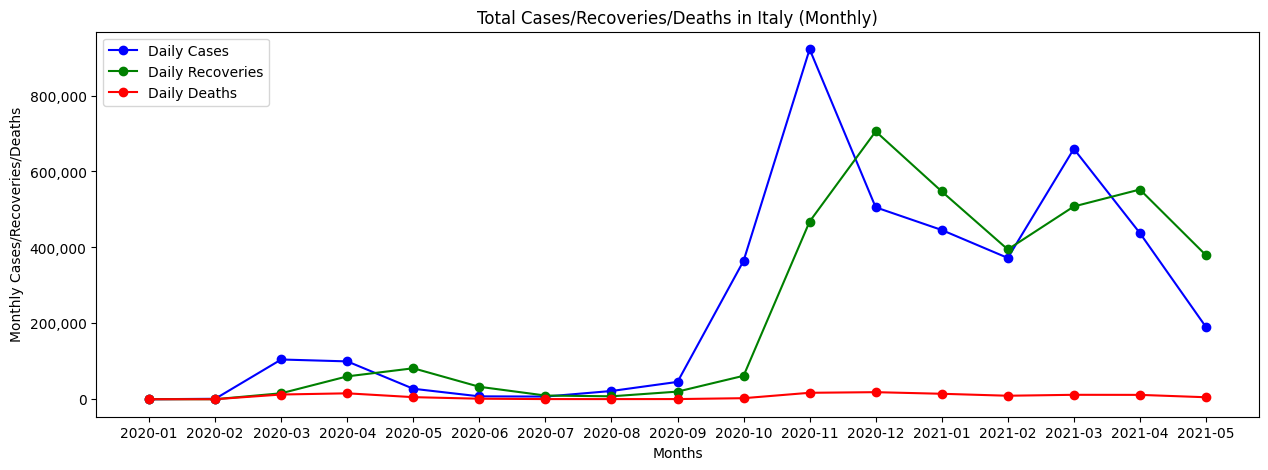

In [187]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.set_title("Total Cases/Recoveries/Deaths in Italy (Monthly)")
ax.plot(merged_data_monthly_italy["Month_Year"].astype(str), merged_data_monthly_italy["Daily_Cases"], label='Daily Cases', color='blue', marker="o")
ax.plot(merged_data_monthly_italy["Month_Year"].astype(str), merged_data_monthly_italy["Daily_Recovered"], label='Daily Recoveries', color='green', marker="o")
ax.plot(merged_data_monthly_italy["Month_Year"].astype(str), merged_data_monthly_italy["Daily_Deaths"], label='Daily Deaths', color='red', marker="o")
ax.set_xlabel("Months")
ax.set_ylabel("Monthly Cases/Recoveries/Deaths")
ax.yaxis.set_major_formatter(lambda x,_: f"{x:,.0f}".format(x))
ax.legend(loc="upper left")
plt.show()

Q8. Combined Data Analysis

In [194]:
merged_data["Year"] = merged_data["Dates"].dt.year
merged_data_2020 = merged_data[merged_data["Year"] == 2020]

In [232]:
merged_data_2020["Deaths_Rates"] = merged_data_2020["Daily_Deaths"]/merged_data_2020["Daily_Cases"]

In [233]:
merged_data_2020["Deaths_Rates"] = merged_data_2020["Deaths_Rates"].astype(float)
merged_data_2020["Deaths_Rates"] = merged_data_2020["Deaths_Rates"].fillna(0).round(3)
merged_data_2020

,Country/Region,Dates,Cases,Recovered,Deaths,Daily_Cases,Daily_Recovered,Daily_Deaths,Month_Year,Year,Deaths_Rates
0,Afghanistan,2020-01-22,0,0,0,0,0,0,2020-01,2020,0.000
1,Afghanistan,2020-01-23,0,0,0,0,0,0,2020-01,2020,0.000
2,Afghanistan,2020-01-24,0,0,0,0,0,0,2020-01,2020,0.000
3,Afghanistan,2020-01-25,0,0,0,0,0,0,2020-01,2020,0.000
4,Afghanistan,2020-01-26,0,0,0,0,0,0,2020-01,2020,0.000
...,...,...,...,...,...,...,...,...,...,...,...
95188,Zimbabwe,2020-12-27,13077,10593,349,114,74,8,2020-12,2020,0.070
95189,Zimbabwe,2020-12-28,13148,10705,354,71,112,5,2020-12,2020,0.070
95190,Zimbabwe,2020-12-29,13325,11067,359,177,362,5,2020-12,2020,0.028
95191,Zimbabwe,2020-12-30,13625,11154,360,300,87,1,2020-12,2020,0.003


In [236]:
merged_data_2020_avg_death_rate = merged_data_2020.groupby("Country/Region")["Deaths_Rates"].mean().replace(np.inf, 0)

In [243]:
merged_data_2020_avg_death_rate_top_5 = merged_data_2020_avg_death_rate.sort_values(ascending=False).head(5)

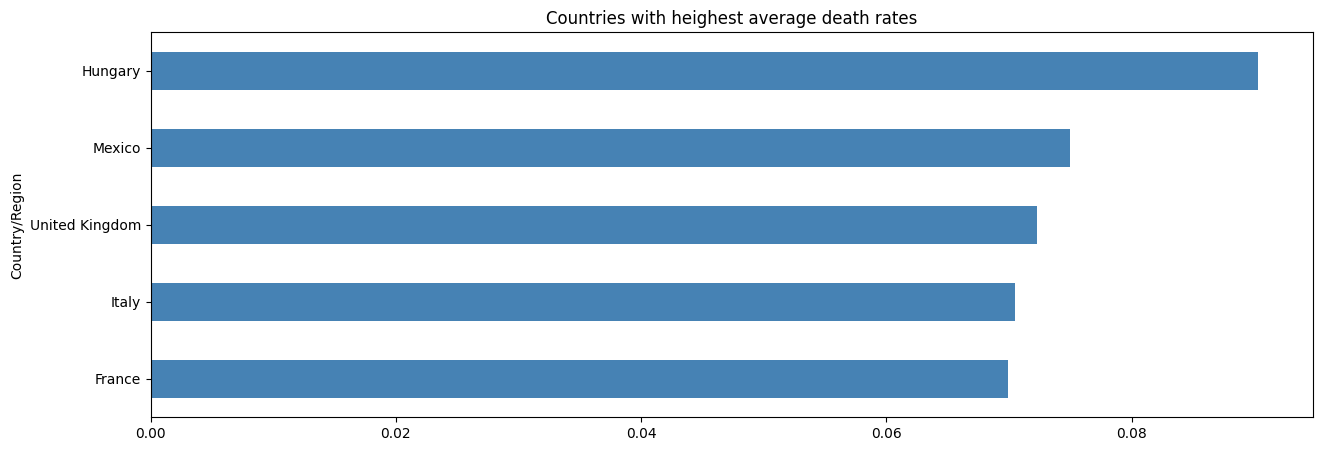

In [246]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.set_title("Countries with heighest average death rates")
merged_data_2020_avg_death_rate_top_5.sort_values().plot(kind="barh", ax=ax, color="steelblue")
plt.show()

In [249]:
merged_data_sa  = merged_data[merged_data["Country/Region"] == "South Africa"]

In [258]:
merged_data_sa_total = merged_data_sa.groupby("Country/Region")[["Daily_Recovered", "Daily_Deaths"]].sum()
merged_data_sa_total.T

Country/Region,South Africa
Daily_Recovered,1554184
Daily_Deaths,56363


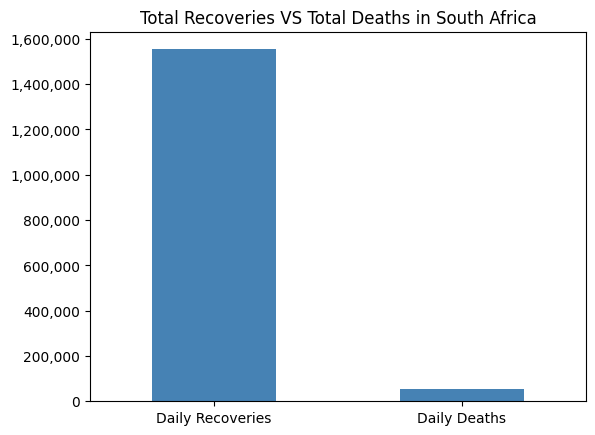

In [270]:
ax = plt.gca()
ax.set_title("Total Recoveries VS Total Deaths in South Africa")
merged_data_sa_total.T.plot(kind="bar", ax=ax, color="steelblue")
ax.legend().remove()
ax.set_xticklabels(["Daily Recoveries", "Daily Deaths"])
plt.xticks(rotation=360)
ax.yaxis.set_major_formatter(lambda x,_: f"{x:,.0f}".format(x))
plt.show()

In [274]:
merged_data_us = merged_data[(merged_data["Country/Region"] == "US") & (merged_data["Month_Year"] >= "2020-03") & (merged_data["Month_Year"] <= "2021-05")]

In [279]:
monthly_snapshot = merged_data_us.loc[merged_data_us.groupby("Month_Year")["Dates"].idxmax()]

In [286]:
monthly_snapshot
monthly_snapshot['cumulative_rate'] = monthly_snapshot["Recovered"] / monthly_snapshot["Cases"]
monthly_snapshot['cumulative_rate'] = monthly_snapshot['cumulative_rate'].astype(float)

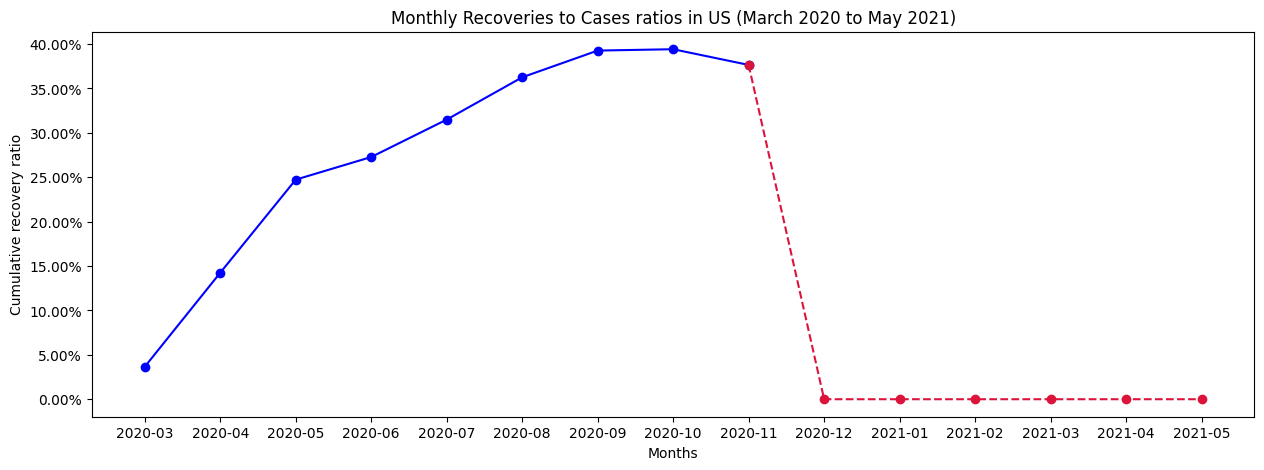

In [299]:
good_data = monthly_snapshot[monthly_snapshot["Month_Year"] < "2020-12"]
bad_data = monthly_snapshot[monthly_snapshot["Month_Year"] >= "2020-11"]
plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.set_title("Monthly Recoveries to Cases ratios in US (March 2020 to May 2021)")
ax.plot(good_data["Month_Year"].astype(str), good_data["cumulative_rate"], color='blue', marker="o")
ax.plot(bad_data["Month_Year"].astype(str), bad_data["cumulative_rate"], linestyle="--", color='crimson', marker="o")
ax.set_xlabel("Months")
ax.set_ylabel("Cumulative recovery ratio")
ax.yaxis.set_major_formatter(lambda x,_: f"{x:.2%}".format(x))
plt.show()